In [14]:
import numpy as np
import sys
sys.path.append('../../')
from stateinterpreter._numerics import logsumexp as logsumexp_cython
from stateinterpreter.numerical_utils import logsumexp
import matplotlib.pyplot as plt
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
import timeit
from tqdm import tqdm

In [3]:
def plot_dist(X,data, ax, color_idx = 0):
    mean = data.mean(axis=1)
    std = data.std(axis=1)
    ax.fill_between(X, mean - std, mean + std, color=colors[color_idx], alpha=0.2)
    ax.plot(X, mean, c=colors[color_idx])

In [9]:
tests = [
    (np.logaddexp.reduce, 'Numpy'),
    (logsumexp, 'Numba'),
    (logsumexp_cython, 'Cython')
]
num_vals =np.arange(100,10000, 100)
repetitions = 10

In [10]:
def evaluate_fn(method, num, loop=100):
    x = np.random.rand(num)
    return timeit.timeit(lambda: method(x), globals=globals(), number=loop)/loop

In [11]:
vals = []
for test in tests:
    method, name = test
    data = np.empty((num_vals.shape[0], repetitions))
    for i, num in tqdm(enumerate(num_vals),desc=name, total=len(num_vals)):
        for j in range(repetitions):
            data[i,j] = evaluate_fn(method, num)
    vals.append(data)


Cython: 100%|██████████| 99/99 [00:02<00:00, 36.76it/s]


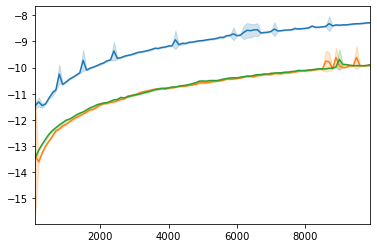

In [13]:
fig, ax = plt.subplots()
for idx, data in enumerate(vals):
    plot_dist(num_vals, np.log(data), ax, color_idx=idx)
ax.margins(x=0)